# Sales Forecasting and Optimization

This project aims to predict future sales for a retail or e-commerce 
business by using historical sales data.

This notebook aims to make Preprocessing data cleaning.

In [1]:
# import necessary libraries and read data 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
data=pd.read_csv('c:\\Users\\ZBOOK\\Downloads\\project DEPI\\train_sample.csv')
data.head()

,id,date,store_nbr,item_nbr,unit_sales,onpromotion,day,month,dayofweek,family,city,state,type
0,0,2013-01-01,21,3,7.0,0,1,1,1,GROCERY I,Santo Domingo,Santo Domingo de los Tsachilas,B
1,1,2013-01-01,21,4,1.0,0,1,1,1,GROCERY I,Santo Domingo,Santo Domingo de los Tsachilas,B
2,2,2013-01-01,21,5,2.0,0,1,1,1,CLEANING,Santo Domingo,Santo Domingo de los Tsachilas,B
3,3,2013-01-01,21,12,1.0,0,1,1,1,GROCERY I,Santo Domingo,Santo Domingo de los Tsachilas,B
4,4,2013-01-01,21,15,1.0,0,1,1,1,BREAD/BAKERY,Santo Domingo,Santo Domingo de los Tsachilas,B


In [2]:
data['date']=pd.to_datetime(data['date'])


Here we plot the raw distribution of unit sales. The distribution is highly skewed, showing many small sales and a few very large ones.

- **Missing Values:** No missing values detected in the dataset.
- **Duplicates:** No duplicate records found.


c:\Users\ZBOOK\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\ZBOOK\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


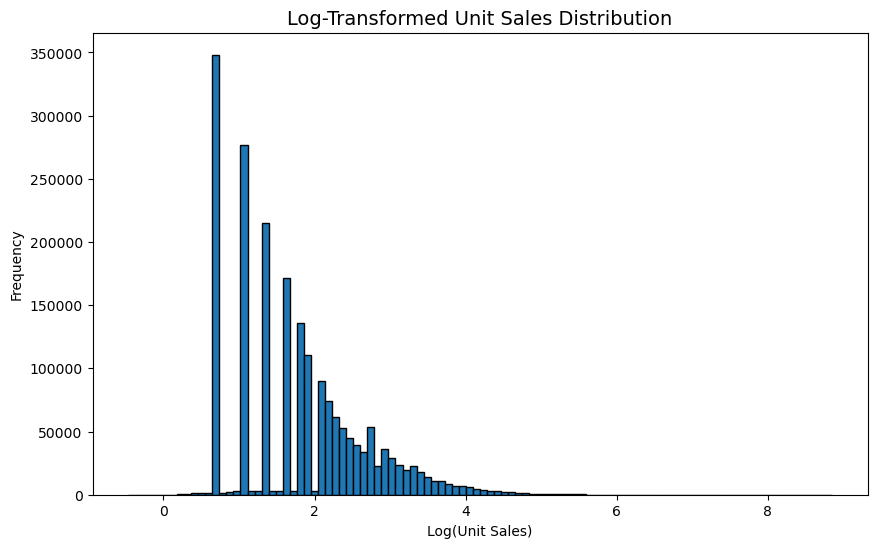

Log-Transformed Unit Sales Summary:
count    1.999873e+06
mean     1.783562e+00
std      8.704122e-01
min     -4.732088e-01
25%      1.098612e+00
50%      1.609438e+00
75%      2.302585e+00
max      8.853951e+00
Name: unit_sales_log, dtype: float64


In [3]:
# Feature engineering: log transform to reduce skewness
data['unit_sales_log'] = np.log1p(data['unit_sales'])  # log10() = log(1+x) to handle 0 values

# Check for finite values (log transform can fail with negatives)
finite_unit_sales_log = data['unit_sales_log'][np.isfinite(data['unit_sales_log'])]

plt.figure(figsize=(10,6))
plt.hist(finite_unit_sales_log, bins=100, edgecolor='black')
plt.title("Log-Transformed Unit Sales Distribution", fontsize=14)
plt.xlabel("Log(Unit Sales)")
plt.ylabel("Frequency")
plt.show()
# Summary statistics
print("Log-Transformed Unit Sales Summary:")
print(finite_unit_sales_log.describe())

In [4]:
# craete a week column from the date column to use it for aggregation
data['week'] = data['date'].dt.isocalendar().week
data.head()

,id,date,store_nbr,item_nbr,unit_sales,onpromotion,day,month,dayofweek,family,city,state,type,unit_sales_log,week
0,0,2013-01-01,21,3,7.0,0,1,1,1,GROCERY I,Santo Domingo,Santo Domingo de los Tsachilas,B,2.079442,1
1,1,2013-01-01,21,4,1.0,0,1,1,1,GROCERY I,Santo Domingo,Santo Domingo de los Tsachilas,B,0.693147,1
2,2,2013-01-01,21,5,2.0,0,1,1,1,CLEANING,Santo Domingo,Santo Domingo de los Tsachilas,B,1.098612,1
3,3,2013-01-01,21,12,1.0,0,1,1,1,GROCERY I,Santo Domingo,Santo Domingo de los Tsachilas,B,0.693147,1
4,4,2013-01-01,21,15,1.0,0,1,1,1,BREAD/BAKERY,Santo Domingo,Santo Domingo de los Tsachilas,B,0.693147,1


In [5]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
le_family = LabelEncoder()
data['family_encoded'] = le_family.fit_transform(data['family'])

le_city = LabelEncoder()
data['city_encoded'] = le_city.fit_transform(data['city'])

le_state = LabelEncoder()
data['state_encoded'] = le_state.fit_transform(data['state'])

le_type = LabelEncoder()
data['type_encoded'] = le_type.fit_transform(data['type'])

In [6]:
data.head()

,id,date,store_nbr,item_nbr,unit_sales,onpromotion,day,month,dayofweek,family,city,state,type,unit_sales_log,week,family_encoded,city_encoded,state_encoded,type_encoded
0,0,2013-01-01,21,3,7.0,0,1,1,1,GROCERY I,Santo Domingo,Santo Domingo de los Tsachilas,B,2.079442,1,12,21,14,1
1,1,2013-01-01,21,4,1.0,0,1,1,1,GROCERY I,Santo Domingo,Santo Domingo de los Tsachilas,B,0.693147,1,12,21,14,1
2,2,2013-01-01,21,5,2.0,0,1,1,1,CLEANING,Santo Domingo,Santo Domingo de los Tsachilas,B,1.098612,1,7,21,14,1
3,3,2013-01-01,21,12,1.0,0,1,1,1,GROCERY I,Santo Domingo,Santo Domingo de los Tsachilas,B,0.693147,1,12,21,14,1
4,4,2013-01-01,21,15,1.0,0,1,1,1,BREAD/BAKERY,Santo Domingo,Santo Domingo de los Tsachilas,B,0.693147,1,5,21,14,1


### Comment:
We create a feature to mark weekends (holidays). This helps us study the impact of holidays on sales.

### ✅ Sales Distribution & Outliers Handling
- Will use **log-transformed sales** (`unit_sales_log`) for modeling to reduce skewness and stabilize variance.  
- Outliers will **not be removed** since they represent real business events (e.g., promotions, holidays).  
- Will **flag outliers** as an additional feature for potential use in feature engineering.  


In [7]:
Q1 = data['unit_sales_log'].quantile(0.25)
Q3 = data['unit_sales_log'].quantile(0.75)
IQR = Q3 - Q1
# outlier flag (1 = outlier, 0 = normal)
data['is_outlier'] = ((data['unit_sales_log'] < (Q1 - 1.5 * IQR)) | 
                      (data['unit_sales_log'] > (Q3 + 1.5 * IQR))).astype(int)


In [8]:
data[[ 'unit_sales_log', 'is_outlier']].head(20)

,unit_sales_log,is_outlier
0,2.079442,0
1,0.693147,0
2,1.098612,0
3,0.693147,0
4,0.693147,0
5,1.386294,0
6,0.693147,0
7,0.693147,0
8,2.639057,0
9,1.386294,0


In [9]:
# 1 > yes outliers , 0 no outliers
data['is_outlier'].value_counts().reset_index()

,is_outlier,count
0,0,1974881
1,1,25119


In [10]:
data.head()

,id,date,store_nbr,item_nbr,unit_sales,onpromotion,day,month,dayofweek,family,city,state,type,unit_sales_log,week,family_encoded,city_encoded,state_encoded,type_encoded,is_outlier
0,0,2013-01-01,21,3,7.0,0,1,1,1,GROCERY I,Santo Domingo,Santo Domingo de los Tsachilas,B,2.079442,1,12,21,14,1,0
1,1,2013-01-01,21,4,1.0,0,1,1,1,GROCERY I,Santo Domingo,Santo Domingo de los Tsachilas,B,0.693147,1,12,21,14,1,0
2,2,2013-01-01,21,5,2.0,0,1,1,1,CLEANING,Santo Domingo,Santo Domingo de los Tsachilas,B,1.098612,1,7,21,14,1,0
3,3,2013-01-01,21,12,1.0,0,1,1,1,GROCERY I,Santo Domingo,Santo Domingo de los Tsachilas,B,0.693147,1,12,21,14,1,0
4,4,2013-01-01,21,15,1.0,0,1,1,1,BREAD/BAKERY,Santo Domingo,Santo Domingo de los Tsachilas,B,0.693147,1,5,21,14,1,0


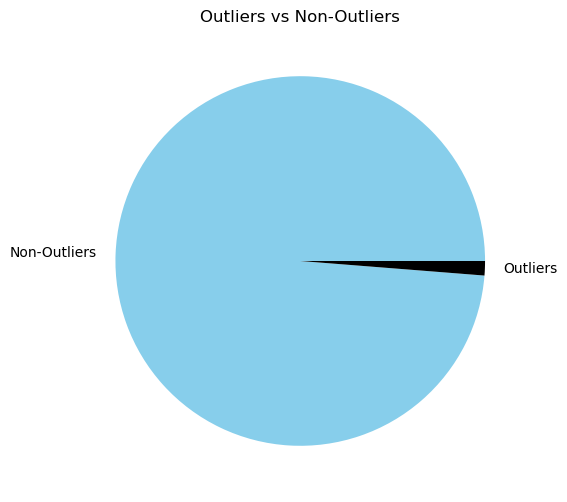

In [11]:
outlier_counts = data['is_outlier'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(outlier_counts.values, 
        labels=["Non-Outliers", "Outliers"],  
        colors=['skyblue','black'])
plt.title("Outliers vs Non-Outliers")
plt.show()

In [12]:
outlier_promo = data.groupby(['is_outlier', 'onpromotion']).size().reset_index(name= 'count_with_or non_with ')
outlier_promo

,is_outlier,onpromotion,count_with_or non_with
0,0,0,891445
1,0,1,1083436
2,1,0,11862
3,1,1,13257


Non-Outliers + No Promotion (0,0): ~ 891,445

Non-Outliers + Promotion (0,1): ~ 1,083,436 (this is the largest group)

Outliers + No Promotion (1,0): ~ 11,862

Outliers + Promotion (1,1): ~ 13,257

In [13]:
# Step 1: Create a flag column for returns
data['is_return'] = (data['unit_sales'] < 0).astype(int)
# Count returns vs non-returns
data['is_return'].value_counts().reset_index()


,is_return,count
0,0,1999870
1,1,130


In [14]:
returns_by_store = data.groupby('store_nbr')['is_return'].sum().reset_index()
returns_by_store.head()

,store_nbr,is_return
0,1,1
1,2,6
2,3,2
3,4,4
4,5,1


In [41]:
returns_by_store = data.groupby('store_nbr')['is_return'].sum().reset_index()
returns_by_store.value_counts().head(15)

store_nbr  is_return
1          1            1
41         2            1
30         4            1
31         5            1
32         3            1
33         0            1
34         0            1
35         5            1
36         1            1
37         5            1
38         6            1
39         3            1
40         1            1
42         10           1
2          6            1
Name: count, dtype: int64

 Most stores have very few returns (between 0–5).

Store 42 recorded the highest number of returns (10).

In [15]:
data['holiday'] = data['date'].dt.dayofweek.isin([5, 6]).astype(int)

In [16]:
x = data.groupby('holiday')['is_outlier'].value_counts().reset_index()
x

,holiday,is_outlier,count
0,0,0,1388738
1,0,1,13552
2,1,0,586143
3,1,1,11567


In [17]:
# Aggregate daily total sales
daily_sales = data.groupby('date')['unit_sales'].sum()

# Create lagged sales columns
daily_sales_df = daily_sales.to_frame(name="unit_sales")
daily_sales_df['lag_7'] = daily_sales_df['unit_sales'].shift(7)
daily_sales_df['lag_14'] = daily_sales_df['unit_sales'].shift(14)
daily_sales_df['lag_30'] = daily_sales_df['unit_sales'].shift(30)

daily_sales_df.head(15)
# Note: The NaN values in the first rows of the lag_7, lag_14, and lag_30 columns are expected and correct. This happens because:
#  For the first 6 days, there is no data from 7 days ago, so the value is NaN. Similarly, lag_14 and lag_30 will be NaN for the first 13 and 29 days,

,unit_sales,lag_7,lag_14,lag_30
date,,,,
2013-01-01,2511.619,NaN,NaN,NaN
2013-01-02,496092.418,NaN,NaN,NaN
2013-01-03,361429.231,NaN,NaN,NaN
2013-01-04,354459.677,NaN,NaN,NaN
2013-01-05,477350.121,NaN,NaN,NaN
2013-01-06,519695.401,NaN,NaN,NaN
2013-01-07,336122.801,NaN,NaN,NaN
2013-01-08,318347.778,2511.619,NaN,NaN
2013-01-09,302530.809,496092.418,NaN,NaN


In [19]:
daily_sales_df[['lag_7', 'lag_14', 'lag_30']] = (
    daily_sales_df[['lag_7', 'lag_14', 'lag_30']].fillna(daily_sales_df.median())
)
daily_sales_df.head(20)


,unit_sales,lag_7,lag_14,lag_30
date,,,,
2013-01-01,2511.619,318347.778,318347.846,327235.3575
2013-01-02,496092.418,318347.778,318347.846,327235.3575
2013-01-03,361429.231,318347.778,318347.846,327235.3575
2013-01-04,354459.677,318347.778,318347.846,327235.3575
2013-01-05,477350.121,318347.778,318347.846,327235.3575
2013-01-06,519695.401,318347.778,318347.846,327235.3575
2013-01-07,336122.801,318347.778,318347.846,327235.3575
2013-01-08,318347.778,2511.619,318347.846,327235.3575
2013-01-09,302530.809,496092.418,318347.846,327235.3575


In [ ]:
# Convert date column to datetime
data['date'] = pd.to_datetime(df['date'])

# Extract useful time features
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day
data['day_of_week'] = data['date'].dt.dayofweek
data['is_weekend'] = data['day_of_week'].apply(lambda x: 1 if x>=5 else 0)

In [ ]:
#   تحويل promotion و holiday لأرقام
data['promotion'] = data['promotion'].map({'Yes':1, 'No':0})
data['holiday'] = data['holiday'].map({'Yes':1, 'No':0})

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data[['sales']] = scaler.fit_transform(data[['sales']])

In [ ]:
# Check missing values
data.isnull().sum()

 
data['sales'] = data['sales'].fillna(data['sales'].mean())

 
data = data.dropna(thresh=len(data) * 0.5, axis=1)

In [ ]:
# Remove duplicates
data = data.drop_duplicates()